In [1]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

In [2]:
# read all the data
ccba = pd.read_csv('public_train_x_ccba_full_hashed.csv') 
cdtx = pd.read_csv('public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('public_train_x_remit1_full_hashed.csv')

public_alert_date = pd.read_csv('public_x_alert_date.csv')
train_alert_date = pd.read_csv('train_x_alert_date.csv')
y_answer = pd.read_csv('train_y_answer.csv')

alert_date = pd.concat([train_alert_date,public_alert_date])
print(train_alert_date.shape)
print(public_alert_date.shape)
print(alert_date.shape)

def refresh_csv():
    ccba = pd.read_csv('public_train_x_ccba_full_hashed.csv') 
    cdtx = pd.read_csv('public_train_x_cdtx0001_full_hashed.csv')
    custinfo = pd.read_csv('public_train_x_custinfo_full_hashed.csv')
    dp = pd.read_csv('public_train_x_dp_full_hashed.csv')
    remit = pd.read_csv('public_train_x_remit1_full_hashed.csv')

    public_alert_date = pd.read_csv('public_x_alert_date.csv')
    train_alert_date = pd.read_csv('train_x_alert_date.csv')
    y_answer = pd.read_csv('train_y_answer.csv')

    alert_date = pd.concat([train_alert_date,public_alert_date])

(23906, 2)
(1845, 2)
(25751, 2)


In [3]:
ccba.head(20)

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,30,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,61,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,91,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,122,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,153,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,183,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,214,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,244,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,275,152628.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
cdtx.head()

,cust_id,date,country,cur_type,amt
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0


In [5]:
custinfo.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5


In [6]:
dp.head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,36,18,2,68265.0,1.0,16,NaN,NaN,0,0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,42,17,2,932058.0,1.0,16,NaN,NaN,0,0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,39,18,2,6089.0,1.0,16,NaN,NaN,0,0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,49,15,2,776715.0,1.0,16,NaN,NaN,0,0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,70,19,2,61630.0,1.0,16,NaN,NaN,0,0


In [7]:
remit.head()

,cust_id,trans_date,trans_no,trade_amount_usd
0,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,148,0,100528.0
1,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,165,0,100528.0
2,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,231,0,89479.0
3,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,291,0,100528.0
4,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,389,0,30158.0


In [8]:
public_alert_date.head()

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365


In [9]:
# check the number of 0 and 1 in y_answer
print(y_answer.loc[y_answer['sar_flag'] == 1].shape)
print(y_answer.loc[y_answer['sar_flag'] == 0].shape)

(234, 2)
(23672, 2)


### 這邊Merge不能亂merge... 現在這個merge法太白吃了...要找到比較好的方法

In [10]:
# # merge dp with y_answer using 'cust_id'
# custinfo_data = pd.merge(custinfo, y_answer, on='alert_key', how='outer')
# # merge custinfo_data with dp using 'cust_id'
# custinfo_data_dp = pd.merge(custinfo_data, dp, on='cust_id', how='outer')

# custinfo_data_dp = pd.merge(custinfo,dp,on='cust_id').merge(y_answer,on='alert_key')

# 12/21 嘗試先將 alert_date、y_answer 合併，然後去找該筆交易資料有哪些feature
# alert_key、date、sar_flag
custinfo_data_dp = pd.merge(alert_date,y_answer,on='alert_key')
print("shape of 'pd.merge(alert_date,y_answer,on='alert_key')':",custinfo_data_dp.shape)

shape of 'pd.merge(alert_date,y_answer,on='alert_key')': (23906, 3)


In [11]:
# cust_id、alert_key
temp = pd.merge(cdtx,custinfo,on='cust_id',how='outer')
print("shape of 'pd.merge(cdtx,custinfo,on='cust_id',how='outer')':",temp.shape)

shape of 'pd.merge(cdtx,custinfo,on='cust_id',how='outer')': (13067169, 10)


In [12]:

custinfo_data_dp = pd.merge(custinfo_data_dp,temp,on=['alert_key','date'],how='left')
print("shape of 'pd.merge(custinfo_data_dp,temp,on=['alert_key'],how='left')':",custinfo_data_dp.shape)

shape of 'pd.merge(custinfo_data_dp,temp,on=['alert_key'],how='left')': (65397, 11)


In [13]:
# rename dp column "tx_date" -> "date" and merge
custinfo_data_dp = pd.merge(custinfo_data_dp,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')
print("shape of 'pd.merge(custinfo_data_dp,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')'",custinfo_data_dp.shape)

print("shape of 'custinfo_data_dp.groupby('alert_key').first()':",custinfo_data_dp.groupby('alert_key').first().shape)
print("shape of 'custinfo_data_dp.groupby('alert_key').first().dropna()':",custinfo_data_dp.groupby('alert_key').first().dropna().shape)

shape of 'pd.merge(custinfo_data_dp,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')' (791314, 21)
shape of 'custinfo_data_dp.groupby('alert_key').first()': (23906, 20)
shape of 'custinfo_data_dp.groupby('alert_key').first().dropna()': (2698, 20)


In [14]:
#check the number of 0 and 1
print(custinfo_data_dp.loc[custinfo_data_dp['sar_flag'] == 0].shape)
print(custinfo_data_dp.loc[custinfo_data_dp['sar_flag'] == 1].shape)

(773277, 21)
(18037, 21)


In [15]:
print(custinfo_data_dp.head())
print(custinfo_data_dp.shape)

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171189     0         0   
2     171189     0         0   
3     171202     0         0   
4     171599     0         0   

                                             cust_id  country  cur_type  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...    134.0      47.0   
1  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...    134.0      47.0   
2  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...    134.0      47.0   
3                                                NaN      NaN       NaN   
4                                                NaN      NaN       NaN   

     amt  risk_rank  occupation_code  total_asset  ...  debit_credit tx_time  \
0  673.0        1.0             17.0     375576.0  ...            DB     8.0   
1  673.0        1.0             17.0     375576.0  ...            DB    10.0   
2  673.0        1.0             17.0     375576.0  ...            DB    12.0   
3    NaN        NaN              NaN

In [16]:
custinfo_data_dp.drop(['alert_key', 'cust_id'], axis=1, inplace=True)
print(custinfo_data_dp.head())
print(custinfo_data_dp.shape)

   date  sar_flag  country  cur_type    amt  risk_rank  occupation_code  \
0     0         0    134.0      47.0  673.0        1.0             17.0   
1     0         0    134.0      47.0  673.0        1.0             17.0   
2     0         0    134.0      47.0  673.0        1.0             17.0   
3     0         0      NaN       NaN    NaN        NaN              NaN   
4     0         0      NaN       NaN    NaN        NaN              NaN   

   total_asset  AGE debit_credit  tx_time  tx_type  tx_amt  exchg_rate  \
0     375576.0  4.0           DB      8.0      2.0   309.0         1.0   
1     375576.0  4.0           DB     10.0      2.0  1020.0         1.0   
2     375576.0  4.0           DB     12.0      2.0   186.0         1.0   
3          NaN  NaN          NaN      NaN      NaN     NaN         NaN   
4          NaN  NaN          NaN      NaN      NaN     NaN         NaN   

   info_asset_code  fiscTxId  txbranch  cross_bank  ATM  
0              1.0       NaN       NaN        

In [17]:
# turn 'debit_credit' into dummy variables
df_x_test = pd.get_dummies(custinfo_data_dp, columns=['debit_credit'])
print(df_x_test.head())
print(df_x_test.shape)

   date  sar_flag  country  cur_type    amt  risk_rank  occupation_code  \
0     0         0    134.0      47.0  673.0        1.0             17.0   
1     0         0    134.0      47.0  673.0        1.0             17.0   
2     0         0    134.0      47.0  673.0        1.0             17.0   
3     0         0      NaN       NaN    NaN        NaN              NaN   
4     0         0      NaN       NaN    NaN        NaN              NaN   

   total_asset  AGE  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
0     375576.0  4.0      8.0      2.0   309.0         1.0              1.0   
1     375576.0  4.0     10.0      2.0  1020.0         1.0              1.0   
2     375576.0  4.0     12.0      2.0   186.0         1.0              1.0   
3          NaN  NaN      NaN      NaN     NaN         NaN              NaN   
4          NaN  NaN      NaN      NaN     NaN         NaN              NaN   

   fiscTxId  txbranch  cross_bank  ATM  debit_credit_CR  debit_credit_DB  
0    

In [18]:
# fill Nan values with 0
df_x_test.fillna(0, inplace=True)
print(df_x_test.head())
print(df_x_test.shape)

   date  sar_flag  country  cur_type    amt  risk_rank  occupation_code  \
0     0         0    134.0      47.0  673.0        1.0             17.0   
1     0         0    134.0      47.0  673.0        1.0             17.0   
2     0         0    134.0      47.0  673.0        1.0             17.0   
3     0         0      0.0       0.0    0.0        0.0              0.0   
4     0         0      0.0       0.0    0.0        0.0              0.0   

   total_asset  AGE  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
0     375576.0  4.0      8.0      2.0   309.0         1.0              1.0   
1     375576.0  4.0     10.0      2.0  1020.0         1.0              1.0   
2     375576.0  4.0     12.0      2.0   186.0         1.0              1.0   
3          0.0  0.0      0.0      0.0     0.0         0.0              0.0   
4          0.0  0.0      0.0      0.0     0.0         0.0              0.0   

   fiscTxId  txbranch  cross_bank  ATM  debit_credit_CR  debit_credit_DB  
0    

<AxesSubplot: title={'center': 'Correlation Matrix'}>

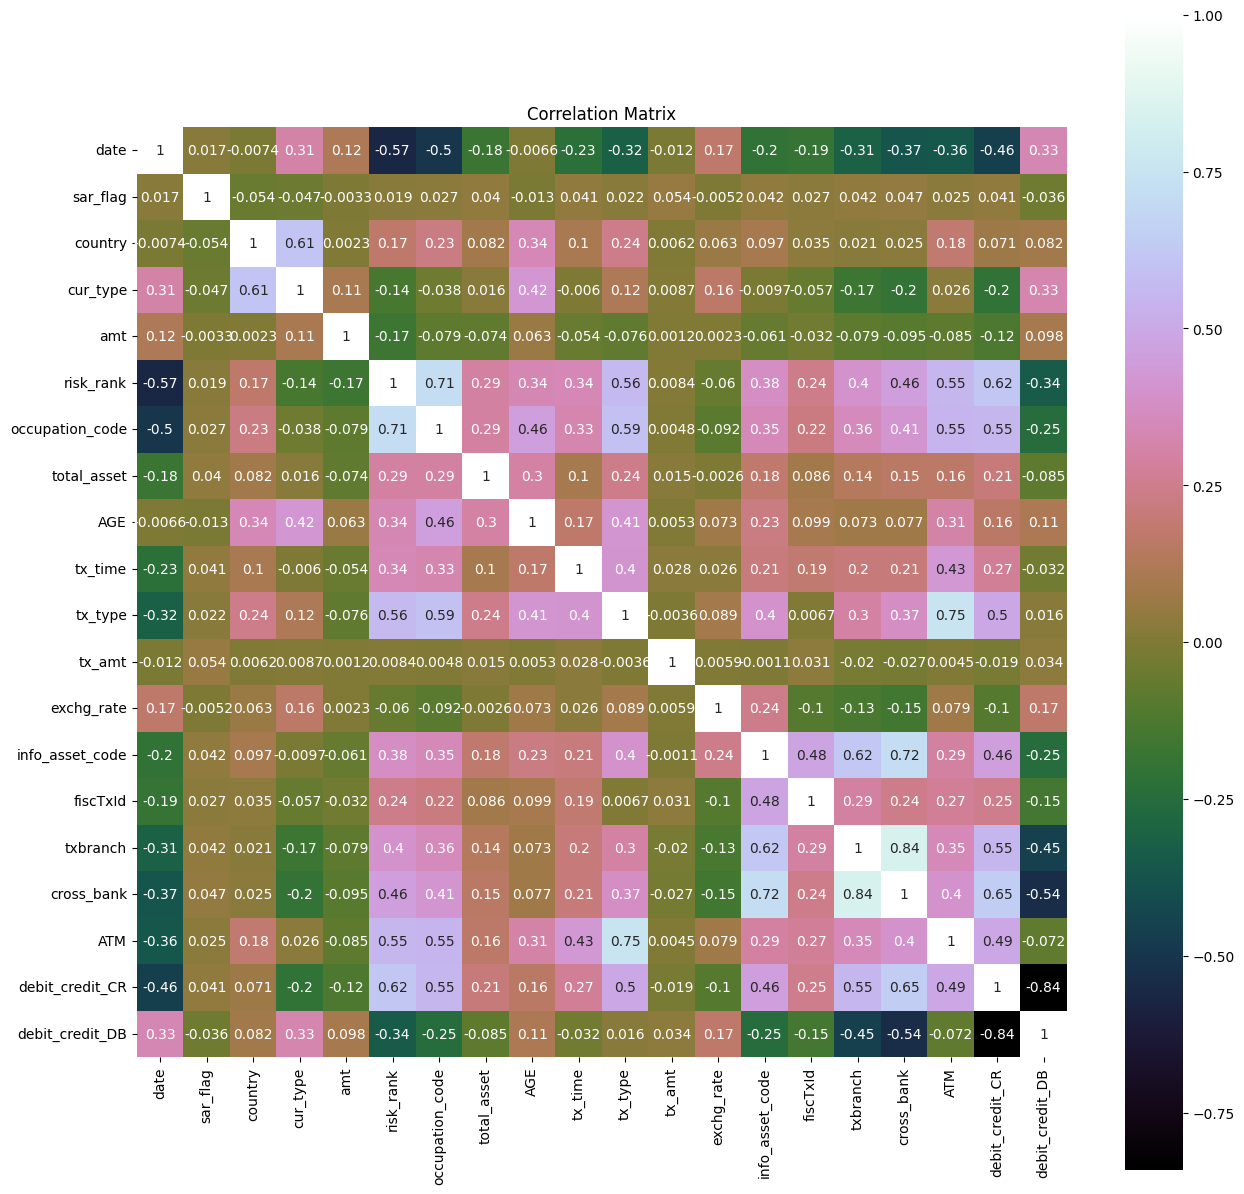

In [19]:
correlation = df_x_test.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

sar_flag跟所有東西都不太相關
哭了

In [20]:
# train test split
X = df_x_test.drop(['sar_flag'], axis=1)
Y = df_x_test['sar_flag']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791314 entries, 0 to 791313
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             791314 non-null  int64  
 1   country          791314 non-null  float64
 2   cur_type         791314 non-null  float64
 3   amt              791314 non-null  float64
 4   risk_rank        791314 non-null  float64
 5   occupation_code  791314 non-null  float64
 6   total_asset      791314 non-null  float64
 7   AGE              791314 non-null  float64
 8   tx_time          791314 non-null  float64
 9   tx_type          791314 non-null  float64
 10  tx_amt           791314 non-null  float64
 11  exchg_rate       791314 non-null  float64
 12  info_asset_code  791314 non-null  float64
 13  fiscTxId         791314 non-null  float64
 14  txbranch         791314 non-null  float64
 15  cross_bank       791314 non-null  float64
 16  ATM              791314 non-null  floa

In [21]:
#ramdom forest
#Import library
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn import ensemble, metrics
from numpy import random
import joblib
import os

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(input_dim=19,units=100,activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(units=10,activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

train = 1
if train == 1:
    batch_size = 100
    # checkpoint
    filepath="weights.best.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')
    callbacks_list = [checkpoint]
    #Train model
    model.fit(X_train,Y_train,epochs=10,batch_size=batch_size,callbacks=callbacks_list)
else:
    model.load_weights("weights.best.hdf5")

Epoch 1/10
6281/6331 [============================>.] - ETA: 0s - loss: 308.1835 - accuracy: 0.9527
Epoch 1: loss improved from inf to 306.07108, saving model to weights.best.hdf5
6331/6331 [==============================] - 4s 593us/step - loss: 306.0711 - accuracy: 0.9528
Epoch 2/10
6325/6331 [============================>.] - ETA: 0s - loss: 33.5425 - accuracy: 0.9532
Epoch 2: loss improved from 306.07108 to 33.52384, saving model to weights.best.hdf5
6331/6331 [==============================] - 4s 580us/step - loss: 33.5238 - accuracy: 0.9532
Epoch 3/10
6298/6331 [============================>.] - ETA: 0s - loss: 13.9330 - accuracy: 0.9534
Epoch 3: loss improved from 33.52384 to 13.89342, saving model to weights.best.hdf5
6331/6331 [==============================] - 4s 590us/step - loss: 13.8934 - accuracy: 0.9535
Epoch 4/10
6302/6331 [============================>.] - ETA: 0s - loss: 3.9151 - accuracy: 0.9556
Epoch 4: loss improved from 13.89342 to 3.89961, saving model to weights

In [22]:
model.load_weights("weights.best.hdf5")

In [23]:
def print_acc(expected,predicted):
    print(metrics.classification_report(expected,predicted))
    print(metrics.confusion_matrix(expected, predicted))
    accuracy = accuracy_score(expected, predicted)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # print("Average = macro")
    print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
    print('recall:',metrics.recall_score(expected, predicted,average='macro'))
    print('F1-score:',metrics.f1_score(expected, predicted,average='macro'))


predicted = model.predict(X_valid).round()
print_acc(Y_valid,predicted)

4946/4946 [==============================] - 2s 436us/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154682
           1       0.20      0.02      0.03      3581

    accuracy                           0.98    158263
   macro avg       0.59      0.51      0.51    158263
weighted avg       0.96      0.98      0.97    158263

[[154456    226]
 [  3524     57]]
Accuracy: 97.63%
precision: 0.58955340323528
recall: 0.5072281397374154
F1-score: 0.5087546615834352


### 提交符合範例的csv檔案

In [24]:
test_x_alert_key = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)
print(test_x_alert_key.shape)
x_with_date = pd.merge(test_x_alert_key,alert_date,how='left')
print(x_with_date.shape)
print(x_with_date.head(20))

x_with_date.fillna(0,inplace=True)

print(x_with_date.head())



(3850, 1)
(3850, 2)
    alert_key   date
0      357307  370.0
1      376329    NaN
2      373644    NaN
3      357668  370.0
4      354443  372.0
5      361128  389.0
6      364753  393.0
7      365254    NaN
8      375177    NaN
9      360609  386.0
10     362463  391.0
11     371048    NaN
12     368703    NaN
13     376496    NaN
14     369160    NaN
15     373250    NaN
16     357108  378.0
17     377450    NaN
18     377489    NaN
19     369183    NaN
   alert_key   date
0     357307  370.0
1     376329    0.0
2     373644    0.0
3     357668  370.0
4     354443  372.0


In [25]:
df_x_test = x_with_date

# cust_id、alert_key
temp = pd.merge(cdtx,custinfo,on='cust_id',how='outer')
print("shape of 'pd.merge(cdtx,custinfo,on='cust_id',how='outer')':",temp.shape)
print(df_x_test.head())

df_x_test = pd.merge(df_x_test,temp,on=['alert_key','date'],how='left')
print("shape of 'pd.merge(df_x_test,temp,on=['alert_key','date'],how='left')':",df_x_test.shape)
print(df_x_test.head())

# rename dp column "tx_date" -> "date" and merge
df_x_test = pd.merge(df_x_test,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')
print("shape of 'pd.merge(df_x_test,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')'",df_x_test.shape)
print(df_x_test.head())

print("shape of 'df_x_test.groupby('alert_key').first()':",df_x_test.groupby('alert_key').first().shape)
print("shape of 'df_x_test.groupby('alert_key').first().dropna()':",df_x_test.groupby('alert_key').first().dropna().shape)

shape of 'pd.merge(cdtx,custinfo,on='cust_id',how='outer')': (13067169, 10)
   alert_key   date
0     357307  370.0
1     376329    0.0
2     373644    0.0
3     357668  370.0
4     354443  372.0
shape of 'pd.merge(df_x_test,temp,on=['alert_key','date'],how='left')': (5567, 10)
   alert_key   date                                            cust_id  \
0     357307  370.0                                                NaN   
1     376329    0.0                                                NaN   
2     373644    0.0                                                NaN   
3     357668  370.0                                                NaN   
4     354443  372.0  c6def618ad861703c025be4f41bdf7569310228ae93aef...   

   country  cur_type  amt  risk_rank  occupation_code  total_asset  AGE  
0      NaN       NaN  NaN        NaN              NaN          NaN  NaN  
1      NaN       NaN  NaN        NaN              NaN          NaN  NaN  
2      NaN       NaN  NaN        NaN              NaN 

In [26]:
df_x_test_ak = df_x_test['alert_key']
df_x_test.drop(['alert_key', 'cust_id'], axis=1, inplace=True)
print(df_x_test.shape)
df_x_test = pd.get_dummies(df_x_test, columns=['debit_credit'])
print(df_x_test.shape)
df_x_test.fillna(0,inplace=True)
print("shape of df_x_test:",df_x_test.shape)
print(df_x_test.info())

for column_name in df_x_test.columns:
    column = df_x_test[column_name]
    print('Count of zeros in column ', column_name, ' is : ', (column == 0).sum())
    #幹你娘都是0怎麼弄

(11570, 18)
(11570, 19)
shape of df_x_test: (11570, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11570 entries, 0 to 11569
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             11570 non-null  float64
 1   country          11570 non-null  float64
 2   cur_type         11570 non-null  float64
 3   amt              11570 non-null  float64
 4   risk_rank        11570 non-null  float64
 5   occupation_code  11570 non-null  float64
 6   total_asset      11570 non-null  float64
 7   AGE              11570 non-null  float64
 8   tx_time          11570 non-null  float64
 9   tx_type          11570 non-null  float64
 10  tx_amt           11570 non-null  float64
 11  exchg_rate       11570 non-null  float64
 12  info_asset_code  11570 non-null  float64
 13  fiscTxId         11570 non-null  float64
 14  txbranch         11570 non-null  float64
 15  cross_bank       11570 non-null  float64
 16  AT

In [27]:
ans_y = model.predict(df_x_test).flatten()

print(ans_y)
print(df_x_test_ak.shape)

df = pd.DataFrame({
    "probability":ans_y
})

final = pd.concat([df_x_test_ak,df],axis=1)

final = final.groupby('alert_key',as_index=False).max()
print(final.shape)

# 機率由大到小
final.sort_values(inplace=True,by=['probability'],ascending=False)
print(final)

final.to_csv('submission.csv', index=False)

362/362 [==============================] - 0s 417us/step
[0.00573852 0.03494964 0.03494964 ... 0.03494964 0.00540834 0.03494964]
(11570,)
(3850, 2)
      alert_key  probability
186      354014     1.000000
215      354246     0.999986
593      356605     0.970459
1806     364722     0.729295
1494     362478     0.506634
...         ...          ...
1412     361848     0.001770
1191     360387     0.001766
1316     361160     0.000464
182      353888     0.000431
1237     360604     0.000039

[3850 rows x 2 columns]
